In [1]:
import anndata
import numpy as np

In [2]:
dataset = anndata.read("global.h5ad")
list_celltypes = dataset.obs['Manually_curated_celltype'].unique().tolist()
list_celltypes = list(filter(lambda x: x not in ['Mast cells', 'pDC','Progenitor', 'Erythroid', 'Megakaryocytes'], list_celltypes))
list_filtered_celltypes = list(filter(lambda x: 'doublets' not in x, list_celltypes)) 
data_filtered = dataset[dataset.obs['Manually_curated_celltype'].isin(list_filtered_celltypes)]

In [11]:
indices_by_celltypes = {}
filtered_indices_by_celltypes = {}
train_indices, test_indices, cv = [], [], []
cell_types = []
ids = []
for cell_type in data_filtered.obs['Manually_curated_celltype'].unique():
    indices = np.where(data_filtered.obs['Manually_curated_celltype'] == cell_type)[0]
    np.random.shuffle(indices)
    indices_by_celltypes.update({cell_type: indices})
    if len(indices) > 500:
        split = int(len(indices)/6)
        test_indices.extend(indices[:split])
        train_indices.extend(indices[split:])
        filtered_indices_by_celltypes.update({cell_type: len(indices[:split])})
        cell_types.append(cell_type)
        ids.append(len(indices[:split]))
    else:
        filtered_indices_by_celltypes.update({cell_type: len(indices)})
        test_indices.extend(indices)
        cell_types.append(cell_type)
        ids.append(len(indices))

In [21]:
min(ids)

39

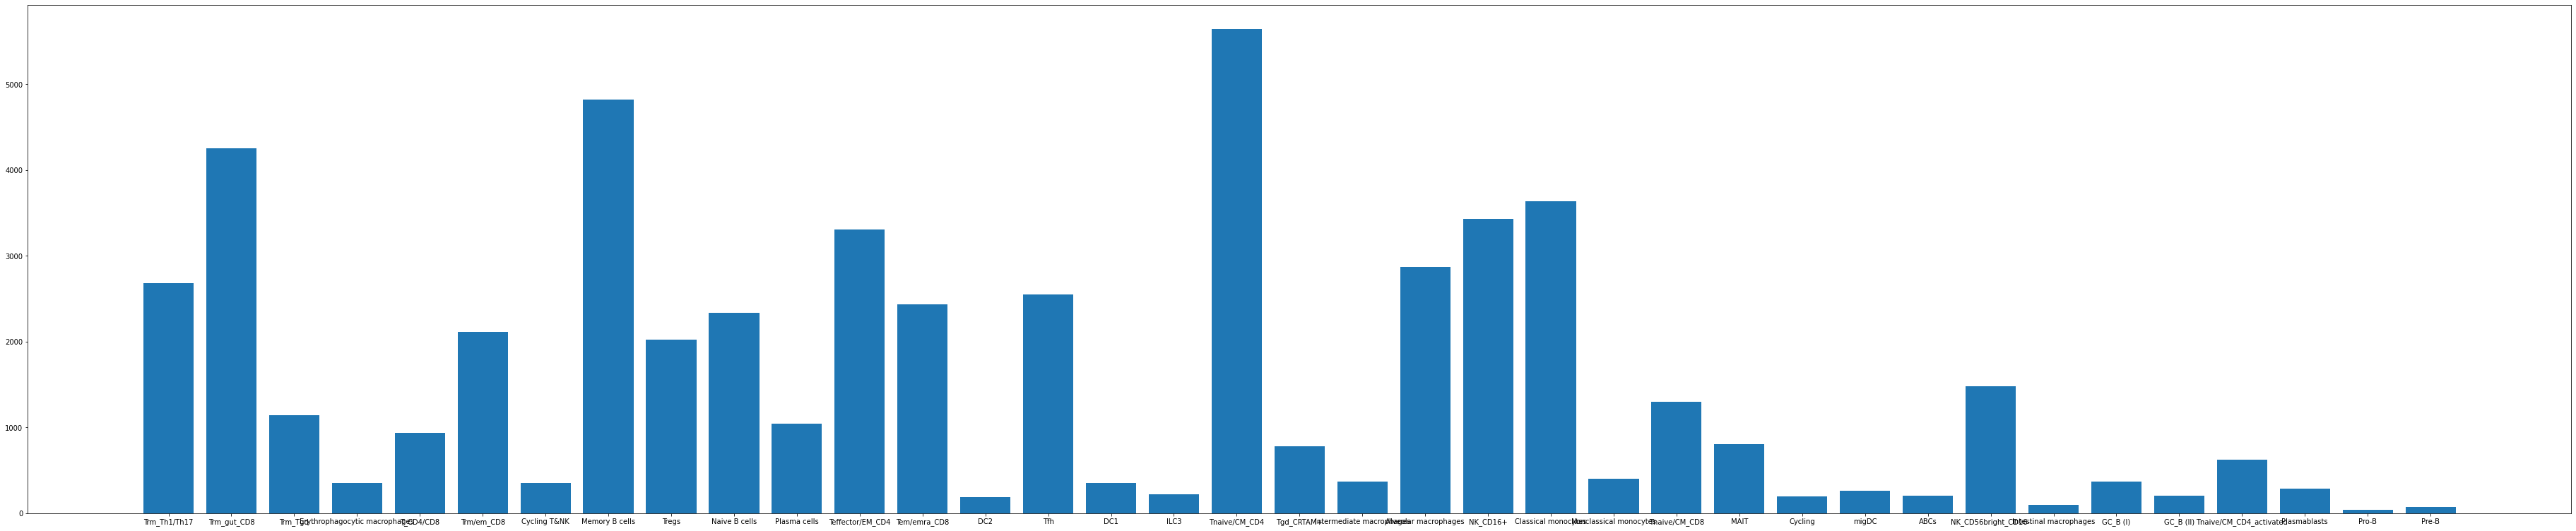

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = cell_types
students = ids
ax.bar(langs,students)
fig.set_size_inches(50,10)
plt.show()

In [ ]:
import seaborn as sns
sns.countplot(x="class", hue="who", data=titanic)

In [7]:
filtered_indices_by_celltypes

{'Trm_Th1/Th17': 2683,
 'Trm_gut_CD8': 4253,
 'Trm_Tgd': 1147,
 'Erythrophagocytic macrophages': 350,
 'T_CD4/CD8': 938,
 'Trm/em_CD8': 2112,
 'Cycling T&NK': 354,
 'Memory B cells': 4819,
 'Tregs': 2023,
 'Naive B cells': 2333,
 'Plasma cells': 1045,
 'Teffector/EM_CD4': 3311,
 'Tem/emra_CD8': 2435,
 'DC2': 191,
 'Tfh': 2548,
 'DC1': 356,
 'ILC3': 218,
 'Tnaive/CM_CD4': 5644,
 'Tgd_CRTAM+': 781,
 'Intermediate macrophages': 372,
 'Alveolar macrophages': 2873,
 'NK_CD16+': 3431,
 'Classical monocytes': 3641,
 'Nonclassical monocytes': 403,
 'Tnaive/CM_CD8': 1300,
 'MAIT': 808,
 'Cycling': 193,
 'migDC': 262,
 'ABCs': 201,
 'NK_CD56bright_CD16-': 1483,
 'Intestinal macrophages': 99,
 'GC_B (I)': 369,
 'GC_B (II)': 203,
 'Tnaive/CM_CD4_activated': 624,
 'Plasmablasts': 285,
 'Pro-B': 39,
 'Pre-B': 75}

In [4]:
filtered_data = data_filtered[test_indices]
filtered_data.write("filtered_data_500.h5ad")